In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/data.csv")

In [ ]:
df.label.value_counts()
# Equal amount of Fake and Real news so no methods for imbalanced data needed

label
1    19999
0    19943
Name: count, dtype: int64

In [ ]:
import random
for i in random.sample(range(len(df)), 10):
    print(df.loc[i, 'title'] + " " + df.loc[i, 'text'])
    print("---")
# no obvious use of tags, additional whitespaces, etc. which require cleaning

Spain aims to avoid economic damage to Catalonia through direct rule: PM MADRID (Reuters) - Spain s central government aims to avoid further economic damage to the wealthy northeastern region of Catalonia due to its secession bid by exercising direct rule, Prime Minister Mariano Rajoy told parliament on Wednesday. More than one thousand firms have moved their legal headquarters out of Catalonia to avoid volatility caused by the independence bid, according to the companies registry, and the uncertainty has prompted Madrid to cut economic forecasts.  
---
Wisconsin to consider $3 billion Foxconn incentive package WASHINGTON (Reuters) - The Wisconsin governor ordered the state legislature back into special session on Tuesday to consider an incentive package that would award Taiwanese electronics manufacturer Foxconn $3 billion over 15 years in mostly cash incentives and waive several state environmental reviews.  Foxconn said last week in a White House ceremony it plans to build a $10 bil

<Axes: >

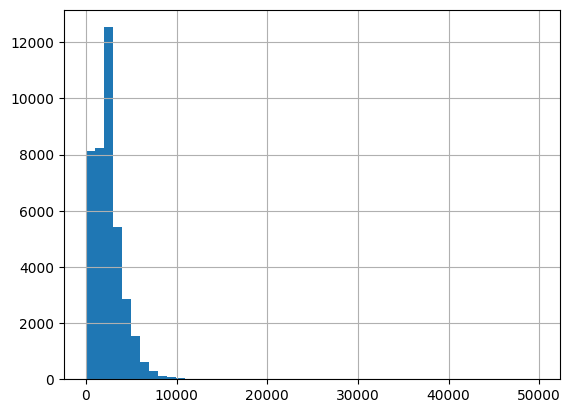

In [ ]:
df['combined_len'] = (df['title'] + " " + df['text']).str.len()
df['combined_len'].hist(bins=50)
# Some articles quite long and might cause issues on embedding

<Axes: >

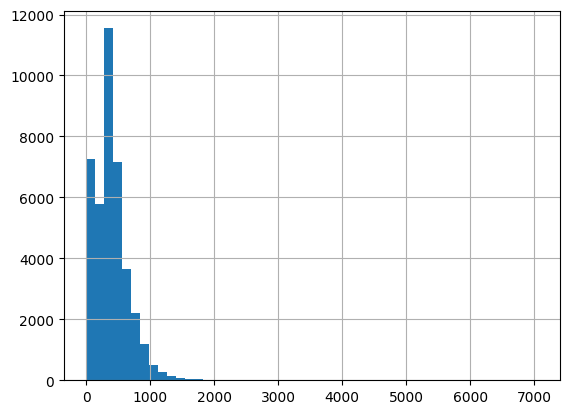

In [ ]:
df['token_count'] = (df['title'] + " " + df['text']).str.split().apply(len)
df['token_count'].hist(bins=50)
# token count for some articles exceed maximum tokens for planned model. Will need to be dealt with for encoding

In [ ]:
import string
all_text = " ".join(df['title'] + " " + df['text'])
special_chars = [c for c in all_text if c not in string.ascii_letters + string.digits + " "]
print("Most frequent special chars:", pd.Series(special_chars).value_counts())
# Some weird charactres that could require cleaning

Most frequent special chars: .    837130
,    786788
-    171829
’     82371
)     71542
      ...  
ê         1
ô         1
➡         1
°         1
﻿         1
Name: count, Length: 83, dtype: int64


In [ ]:
starts = df['text'].str[:50].value_counts().head(10)
ends = df['text'].str[-50:].value_counts().head(10)
print("Common starts:", starts)
print("Common ends:", ends)
# Whitespaces at end and beginning to be cleaned as well as boilerplate text

Common starts: text
                                                      606
WASHINGTON (Reuters) - U.S. President Donald Trump    517
The following statements were posted to the verifi     91
WASHINGTON (Reuters) - U.S. President Barack Obama     87
WASHINGTON (Reuters) - The U.S. House of Represent     76
WASHINGTON (Reuters) - President-elect Donald Trum     75
WASHINGTON (Reuters) - U.S. House of Representativ     74
WASHINGTON (Reuters) - U.S. Secretary of State Rex     74
LONDON (Reuters) - British Prime Minister Theresa      68
WASHINGTON (Reuters) - Republican presidential can     67
Name: count, dtype: int64
Common ends: text
                                                      606
itorial involvement in its creation or production.    180
-- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR)      97
ntly produced by the staff of Reuters News Agency.     84
SAP, which otherwise has no role in this coverage.     66
tured image via screen capture from embedded video     65
eatured 

In [ ]:
df['combined'] = df['title'] + " " + df['text']
print(df['combined'].isna().sum())
print((df['combined'].str.strip() == "").sum())
# No empty rows

0
0


In [ ]:
df